## Quantum Dot

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import quad
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

##### Configuration of graphs

In [208]:
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["lines.linewidth"] = 1.2
plt.rcParams["axes.linewidth"] = 1
set_matplotlib_formats('retina')

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\848395888.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


##### Constants used

In [209]:
e = 1.0 
h = 1.0  
k_B = 1.0 
E0 = 0.0 
T = 1.0
dT = 0.0
T_L = T + dT/2
T_R = T - dT/2
mu_L = lambda V: e * V / 2
mu_R = lambda V: -e * V / 2

#### Auxiliar functions

In [210]:
# Transmission function for a single level quantum dot
def T_E(E, E0, Gamma):
    return (4 * Gamma**2) / ((E - E0)**2 + (2 * Gamma)**2)

# Fermi-Dirac distribution function
def f_FD(E, mu, T):
    return 1 / (1 + np.exp((E - mu) / (k_B * T)))

#### Transmission function

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\614231691.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{T}(E)$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\614231691.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)


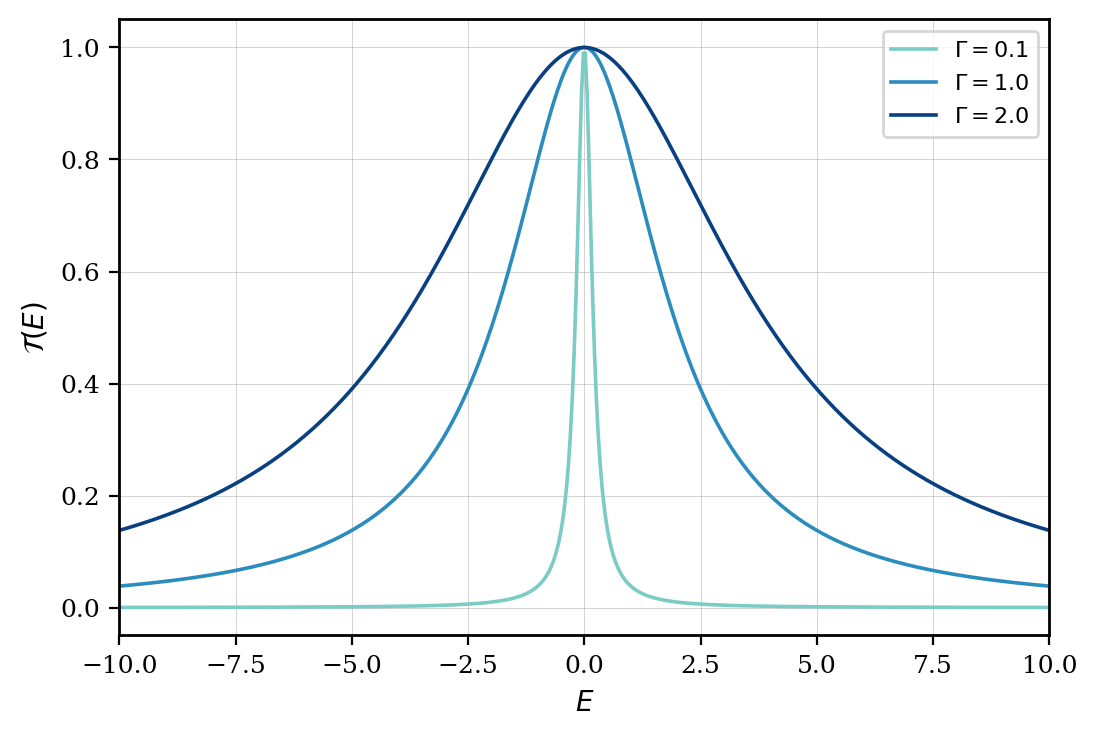

In [211]:
# Range of energies
E_range = np.linspace(-10, 10, 500)

# Parameters
E0 = 0 
Gamma_vals = [0.1, 1.0, 2.0] 
colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

# Plotting the transmission function for different Gamma values
for idx, Gamma in enumerate(Gamma_vals):
    T_E_vals = [T_E(E, E0, Gamma) for E in E_range]
    plt.plot(E_range, T_E_vals, label=f"$\\Gamma = {Gamma}$", color=colors[idx], linewidth=1.3)

plt.xlabel("$E$")
plt.ylabel("$\mathcal{T}(E)$")
plt.legend(loc="best", fontsize=8)
plt.xlim(-10, 10)
plt.grid(linewidth=0.2)
plt.show()

##### Charge and heat current :

In [212]:
# Charge currents
def I_L(mu_L, mu_R, T_L, T_R, Gamma, E0):
    integrand = lambda E: - T_E(E, E0, Gamma) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

def I_R(mu_L, mu_R, T_L, T_R, Gamma, E0):
    integrand = lambda E: T_E(E, E0, Gamma) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

In [213]:
# Heat currents
def J_L(mu_L, mu_R, T_L, T_R, Gamma, E0):
    integrand = lambda E: T_E(E, E0, Gamma) * (E - mu_L) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

def J_R(mu_L, mu_R, T_L, T_R, Gamma, E0):
    integrand = lambda E:  -T_E(E, E0, Gamma) * (E - mu_R) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (1 / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\2708619656.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


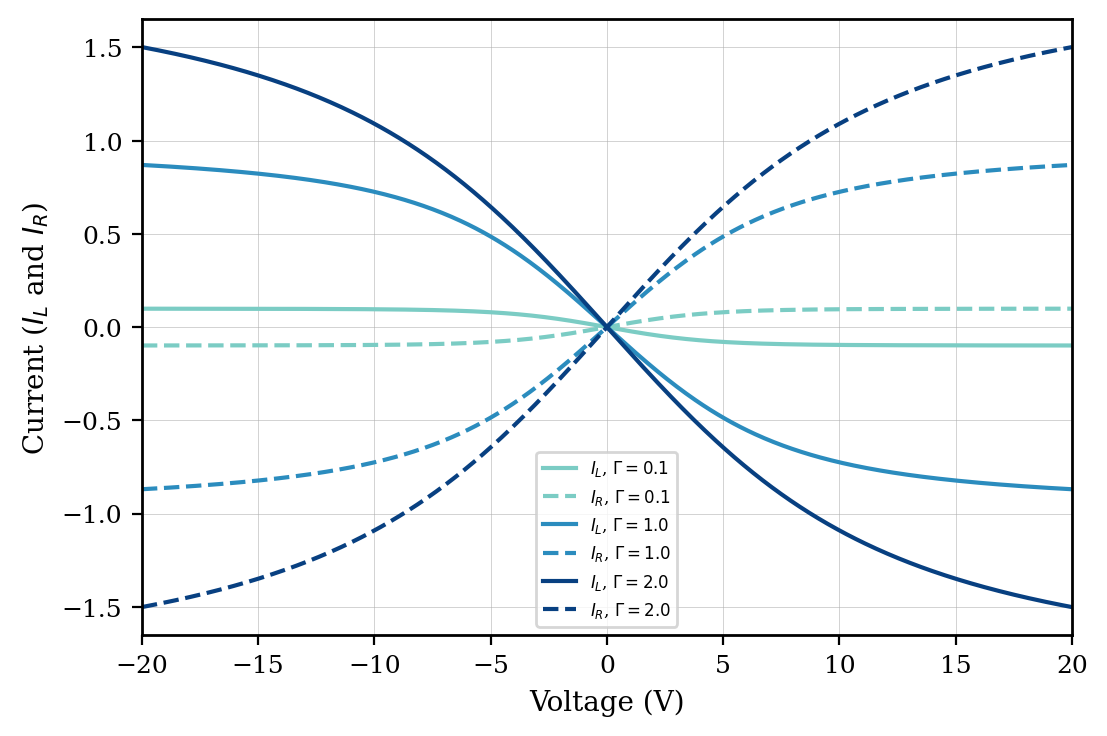

In [214]:
Gamma_vals = [0.1, 1.0, 2.0]  
colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

# Plot I_L (solid) and I_R (dashed) for each Gamma
for idx, Gamma in enumerate(Gamma_vals):
    V_range = np.linspace(-20, 20, 500)
    I_L_vals = [I_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    I_R_vals = [I_R(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    
    plt.plot(V_range, I_L_vals, label=f"$I_L$, $\\Gamma = {Gamma}$", color=colors[idx], linestyle='-', linewidth=1.5)
    plt.plot(V_range, I_R_vals, label=f"$I_R$, $\\Gamma = {Gamma}$", color=colors[idx], linestyle='--', linewidth=1.5)

plt.xlabel("Voltage (V)")
plt.ylabel("Current ($I_L$ and $I_R$)")
plt.legend(loc="best", fontsize=6)
plt.grid(linewidth=0.2)
plt.xlim(-20, 20)
plt.show()

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1495401374.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


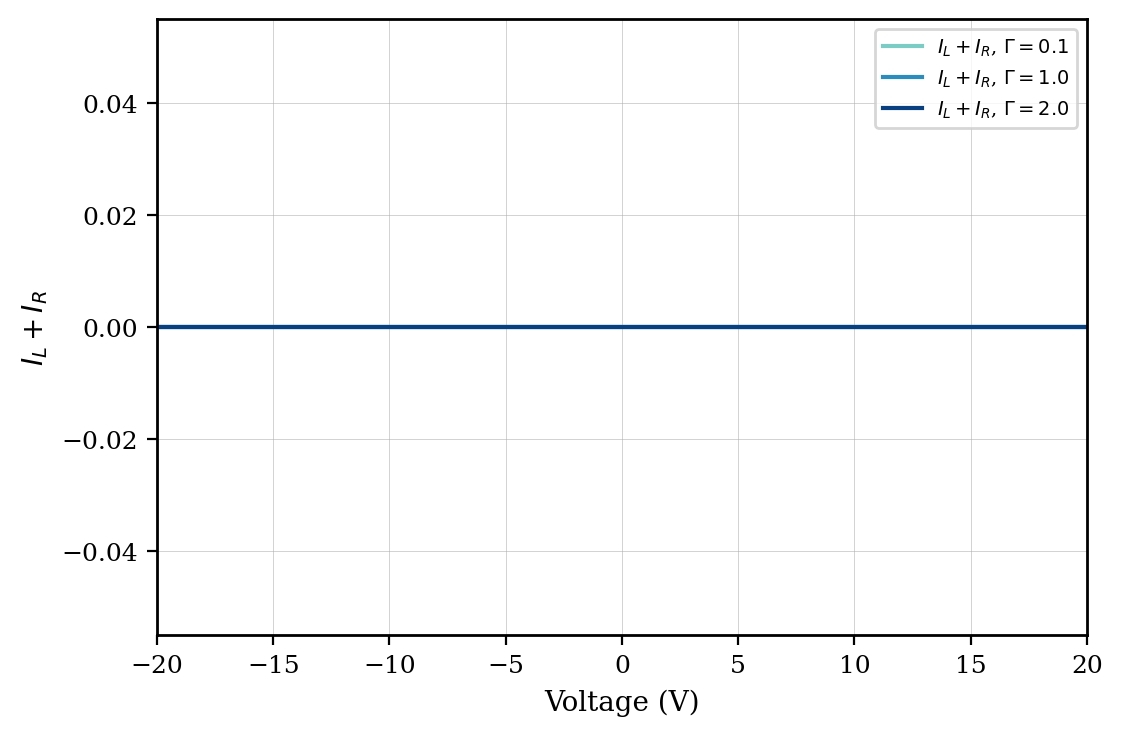

In [215]:
# Conservation of charge current
# Plotting the sum of currents I_L + I_R for different Gamma values
Gamma_vals = [0.1, 1.0, 2.0]  
colorin = cm.get_cmap('GnBu', 5)
colors = [colorin(i+2) for i in range(3)]

for idx, Gamma in enumerate(Gamma_vals):
    V_range = np.linspace(-20, 20, 500)
    I_L_vals = [I_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    I_R_vals = [I_R(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    I_sum = np.array(I_L_vals) + np.array(I_R_vals)
    plt.plot(V_range, I_sum, label=f"$I_L + I_R$, $\\Gamma = {Gamma}$", color=colors[idx], linewidth=1.5)

plt.xlabel("Voltage (V)")
plt.ylabel("$I_L + I_R$")
plt.legend(loc="best", fontsize=7)
plt.grid(linewidth=0.2)
plt.xlim(-20, 20)
plt.show()

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\534036517.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


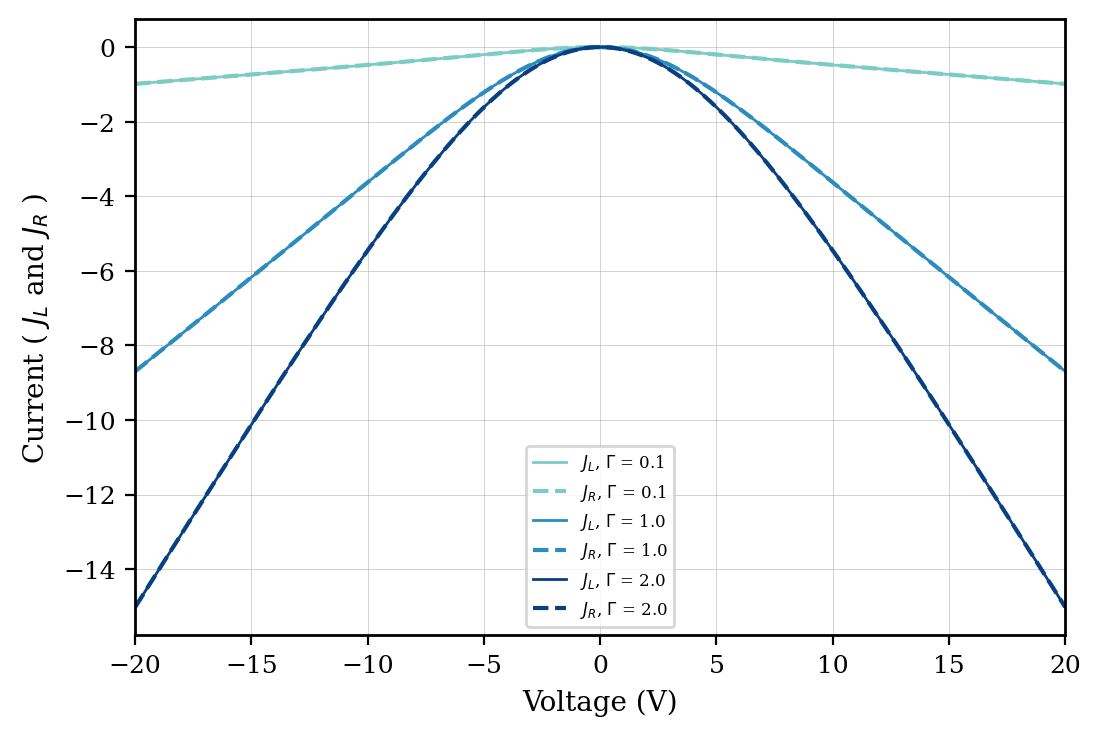

In [216]:
# Plot heat currents J_L and J_R for different Gamma values
Gamma_vals = [0.1, 1.0, 2.0]  
colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

for idx, Gamma in enumerate(Gamma_vals):
    V_range = np.linspace(-20, 20, 500) 
    J_L_vals = [J_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    J_R_vals = [J_R(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
        
    # Plot J_L
    plt.plot(V_range, J_L_vals, label=f"$J_L$, $\\Gamma$ = {Gamma}", color=colors[idx], linestyle='-', linewidth=1.0)
    # Plot J_R
    plt.plot(V_range, J_R_vals, label=f"$J_R$, $\\Gamma$ = {Gamma}", color=colors[idx], linestyle='--', linewidth=1.5)

plt.xlabel("Voltage (V)")
plt.ylabel("Current ( $J_L$ and $J_R$ )")
plt.legend(loc="best", fontsize=6)  
plt.grid(linewidth=0.2)
plt.xlim(-20, 20)
plt.show()

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


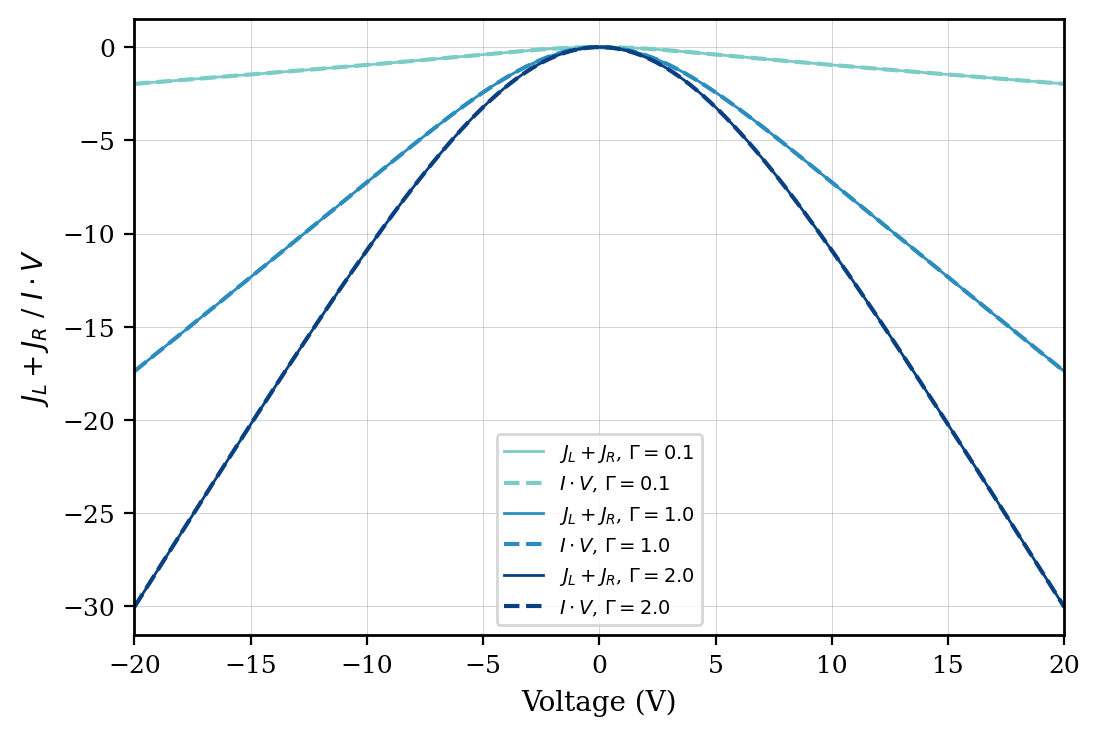

In [217]:
# Conservation of heat current
for idx, Gamma in enumerate(Gamma_vals):
    V_range = np.linspace(-20, 20, 500)
    J_L_vals = [J_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    J_R_vals = [J_R(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    I_L_vals = [I_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    J_sum = np.array(J_L_vals) + np.array(J_R_vals)
    ILV = np.array(I_L_vals) * V_range
    plt.plot(V_range, J_sum, label=f"$J_L + J_R$, $\\Gamma = {Gamma}$", color=colors[idx], linewidth=1)
    plt.plot(V_range, ILV, label=f"$I \\cdot V$, $\\Gamma = {Gamma}$", color=colors[idx], linestyle='--', linewidth=1.5)

plt.xlabel("Voltage (V)")
plt.ylabel("$J_L + J_R$ / $I \\cdot V$")
plt.legend(loc="best", fontsize=7)
plt.grid(linewidth=0.2)
plt.xlim(-20, 20)
plt.show()

##### Charge Noise (S):

In [218]:
def noise(mu_L, mu_R, T_L, T_R, Gamma, E0):
    """Ruido en el sistema"""
    integrand = lambda E: T_E(E, E0, Gamma) *( f_FD(E, mu_L, T_L) * (1 - f_FD(E, mu_L, T_L)) + f_FD(E, mu_R, T_R) * (1 - f_FD(E, mu_R, T_R))) + T_E(E, E0, Gamma)*(1-T_E(E, E0, Gamma))*(f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))**2
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\544274313.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\544274313.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


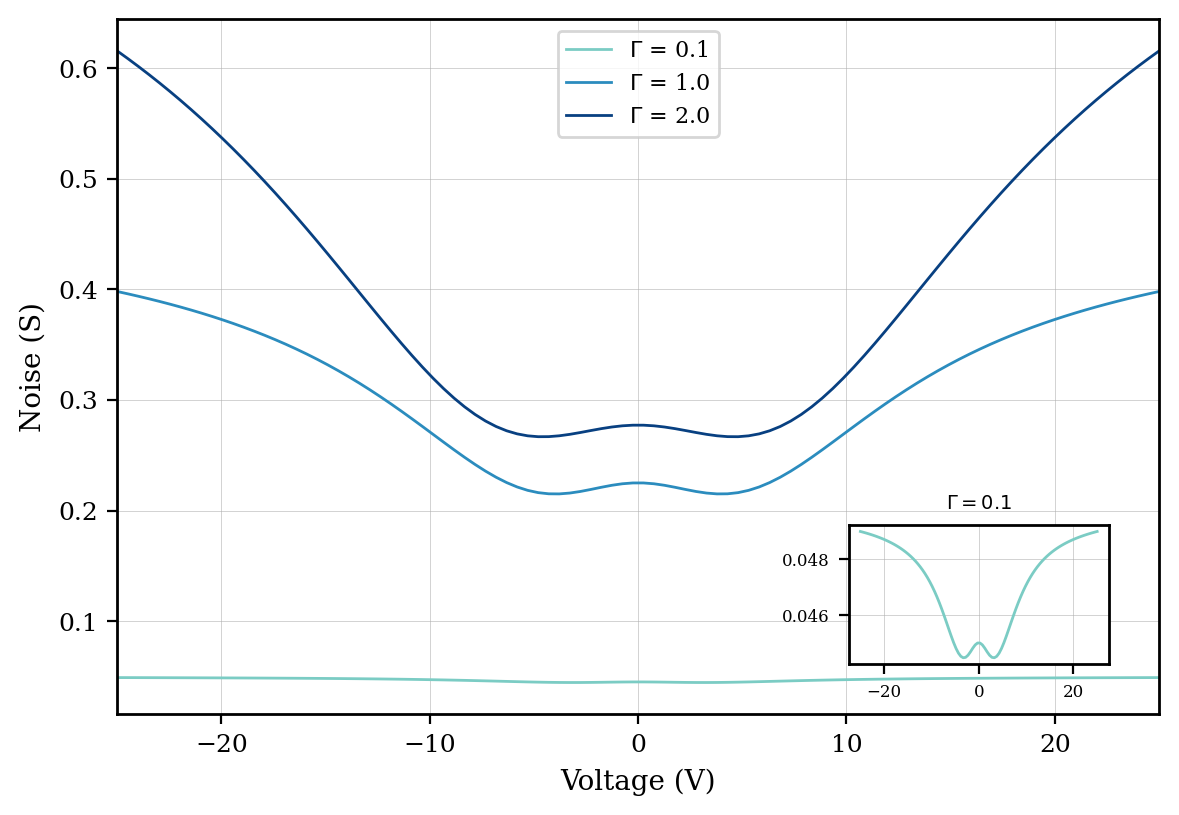

In [219]:
Gamma_vals = [0.1, 1.0, 2.0]  
colorin = cm.get_cmap('GnBu', 5)
colors = [colorin(i+2) for i in range(3)]

V_range = np.linspace(-25, 25, 100)

fig, ax = plt.subplots(figsize=(6, 4.2))

for idx, Gamma in enumerate(Gamma_vals):
    S_vals = [noise(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0) for V in V_range]
    ax.plot(V_range, S_vals, label=f"$\\Gamma$ = {Gamma}", color=colors[idx], linewidth=1)
    if Gamma == 0.1:
        S_vals_g01 = S_vals  # Guardamos la curva para el subgráfico

# Añadir el gráfico pequeño abajo a la derecha
ax_inset = inset_axes(ax, width="25%", height="20%", loc="lower right", borderpad=2)
ax_inset.plot(V_range, S_vals_g01, color=colors[0], linewidth=1)
ax_inset.set_title("$\\Gamma = 0.1$", fontsize=7)
ax_inset.tick_params(axis='both', which='major', labelsize=6)
ax_inset.grid(linewidth=0.2)

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Noise (S)")
ax.legend(loc="best", fontsize=8)
ax.set_xlim(-25, 25)
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.show()

### TUR factor

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\57185801.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{F}$ / $V^2$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\57185801.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


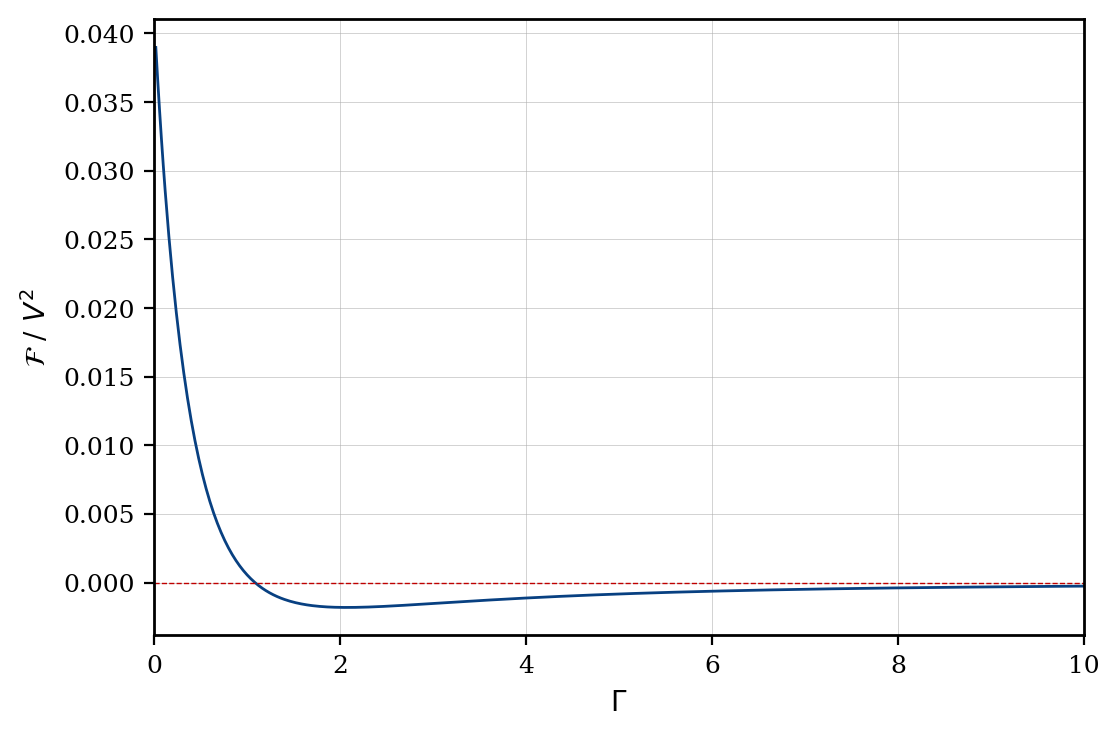

In [220]:
Gamma_range = np.linspace(0, 10, 500)
V_fixed = 1
E0 = 0
F_vals = []

for Gamma in Gamma_range:
    I_val_L = I_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    S_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R , Gamma, E0)
    if I_val_L != 0:
        F = -(V_fixed * S_val) / (I_val_L *k_B* T_L) - 2
    else:
        F = np.inf  # Avoid division by zero
    F_vals.append(F)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Plotting F/V^2 as a function of Gamma
plt.plot(Gamma_range, np.array(F_vals) / V_fixed**2, color=colors, linewidth=1)
plt.xlabel("$\\Gamma$")
plt.ylabel("$\mathcal{F}$ / $V^2$")
plt.axhline(y=0, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()

##### aproximation of the TUR factor for small voltages

<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1967833221.py:45: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{F}$ / $V^2$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1967833221.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


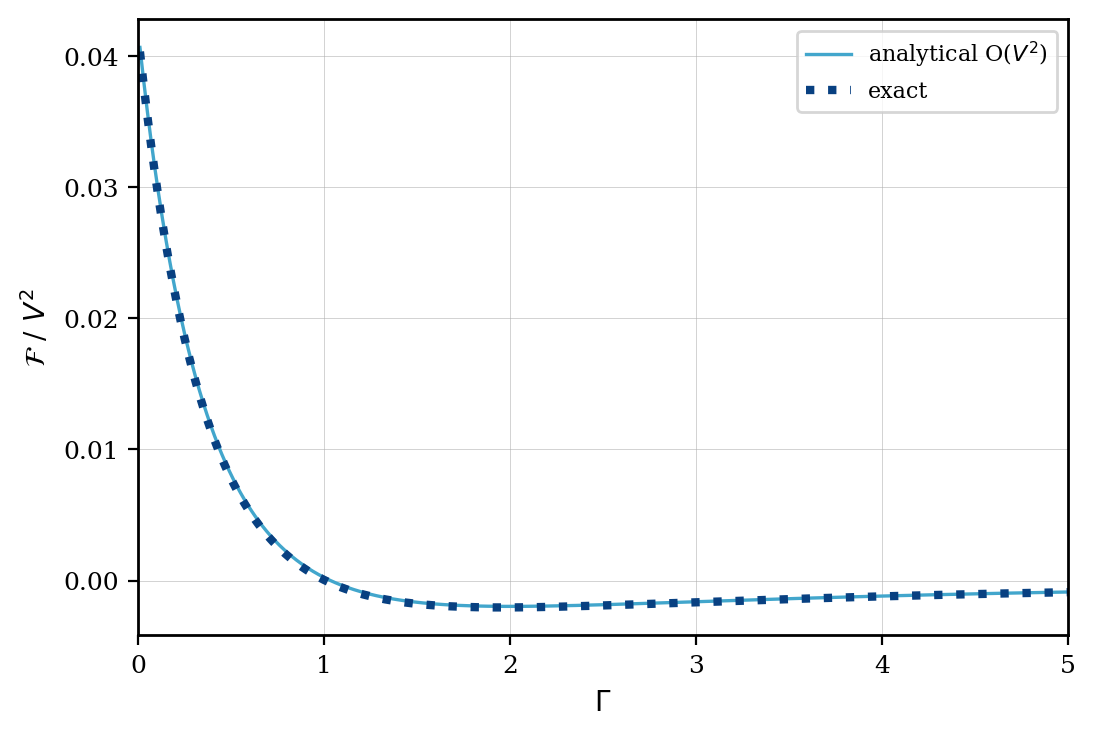

In [221]:
def aprox(T, Gamma, E0, V):
    # Constante beta
    beta = 1 / (k_B * T)
    
    # Definir Cneq
    def integrand_Cneq(E):
        T_E_val = T_E(E, E0, Gamma)
        f_val = f_FD(E, V, T)
        return (beta**2 / 6) * T_E_val * f_val * (1 - f_val) * (1 - 6 * T_E_val * f_val * (1 - f_val))
    
    Cneq = quad(integrand_Cneq, -np.inf, np.inf)[0] / (h)
    
    # Definir G1
    def integrand_G1(E):
        T_E_val = T_E(E, E0, Gamma)
        f_val = f_FD(E, V, T)
        return T_E_val * (f_val * (1 - f_val))
    
    G1 = quad(integrand_G1, -np.inf, np.inf)[0] / h
    
    # Retornar la aproximación
    if G1 != 0:
        return Cneq / G1
    else:
        return np.inf  # Avoid division by zero

V_fixed = 0.1
Gamma_val = np.linspace(0, 10, 1000)
F_TUR_APROX = [aprox(T, Gamma, E0, V_fixed) for Gamma in Gamma_val]

F_vals = []
for Gamma in Gamma_val:
    I_val_L = I_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    S_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    F = -(V_fixed * S_val) / (I_val_L * k_B * T_L) - 2 if I_val_L != 0 else np.inf
    F_vals.append(F)

colorin = cm.get_cmap('GnBu', 4)

plt.plot(Gamma_val, np.array(F_TUR_APROX), color=colorin(2), label="analytical O($V^2$)", linestyle='-')
plt.plot(Gamma_val, np.array(F_vals)/V_fixed**2 , color=colorin(4), label="exact", linestyle=':', linewidth=3)

# Configuración del gráfico
plt.xlabel("$\\Gamma$")
plt.ylabel("$\mathcal{F}$ / $V^2$")
plt.legend(loc="best", fontsize=8)
plt.xlim(0, 5)

plt.grid(linewidth=0.2)
plt.show()

##### colormap of the solution

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1392047088.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="$\mathcal{F}$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1392047088.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.clabel(contour, fmt={0: '$\mathcal{F}$=0'}, inline=True, fontsize=8)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


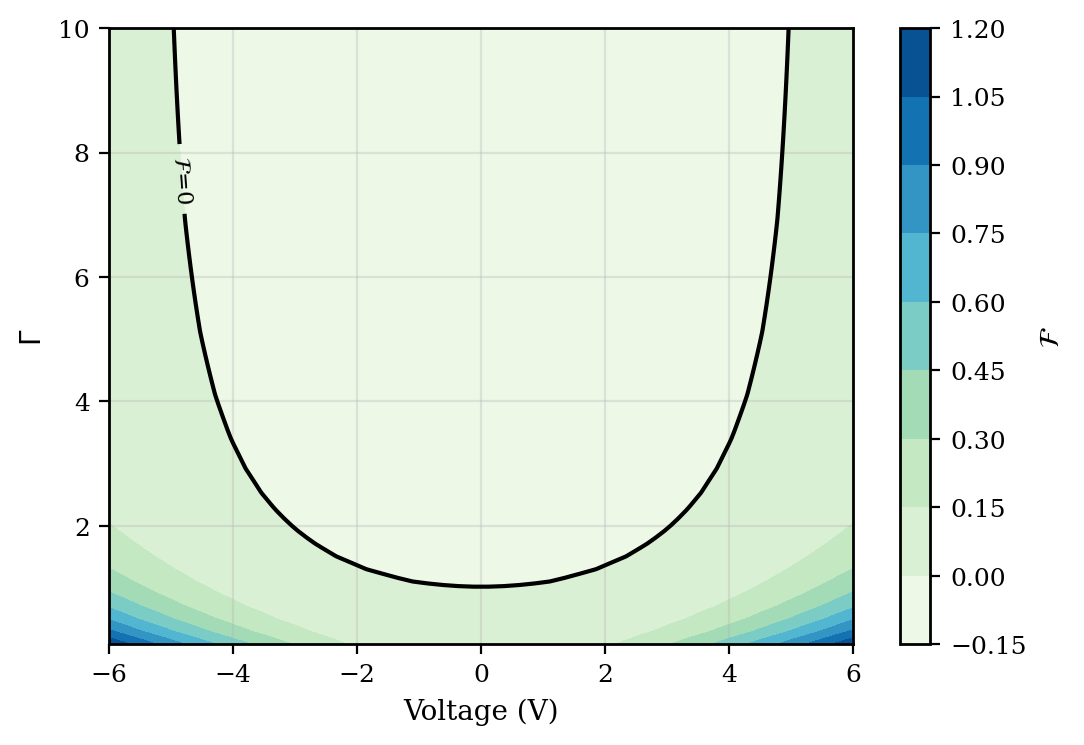

In [222]:
Gamma_range = np.linspace(0.1, 10, 50)  
V_range = np.linspace(-6, 6, 50) 
Gamma_mesh, V_mesh = np.meshgrid(Gamma_range, V_range)

F_TUR = np.zeros_like(Gamma_mesh)
E0 = 0 

for i in range(len(V_range)):
    for j in range(len(Gamma_range)):
        Gamma_val = Gamma_mesh[i, j]
        V_val = V_mesh[i, j]
        
        I_val_L = I_L(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        J_val_L = J_L(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        J_val_R = J_R(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        S_val = noise(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
            
        if I_val_L != 0:
            F_TUR[i, j] = -(S_val * (J_val_L/T_L + J_val_R/T_R)) / (I_val_L**2 *k_B) - 2
        else:
            F_TUR[i, j] = np.inf  # avid division by zero

plt.contourf(V_mesh, Gamma_mesh, F_TUR, cmap="GnBu")
plt.colorbar(label="$\mathcal{F}$")
contour = plt.contour(V_mesh, Gamma_mesh, F_TUR, levels=[0], colors='k', linewidths=1.5)  # line for TUR=0
plt.clabel(contour, fmt={0: '$\mathcal{F}$=0'}, inline=True, fontsize=8)

plt.xlabel("Voltage (V)")
plt.ylabel("$\\Gamma$")
plt.grid(alpha=0.3)
plt.show()

#### With temperature gradient

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\560850281.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{F}$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1034346932.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\560850281.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


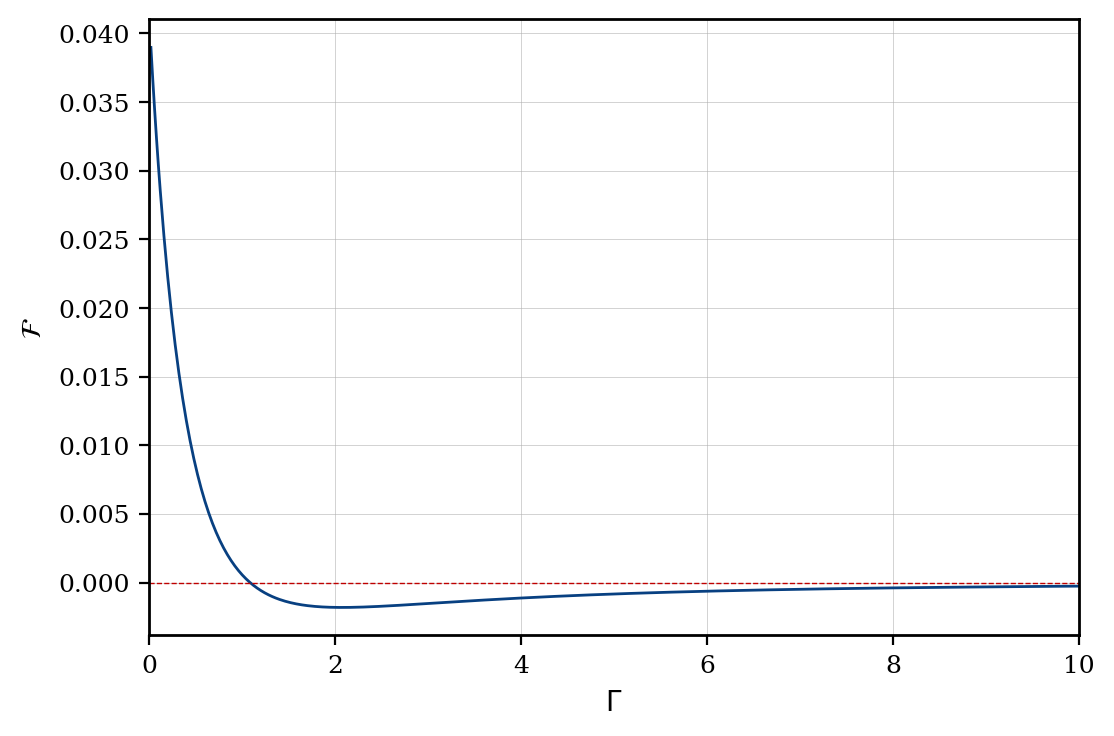

In [223]:
Gamma_range = np.linspace(0, 10, 500)
V_fixed = 1
F_vals = []

for Gamma in Gamma_range:
    mu_L = e * V_fixed / 2
    mu_R = -e * V_fixed / 2
    I_val_L = I_L(mu_L, mu_R, T_L, T_R, Gamma, E0)
    J_val_L = J_L(mu_L, mu_R, T_L, T_R, Gamma, E0)
    J_val_R = J_R(mu_L, mu_R, T_L, T_R, Gamma, E0)
    S_val = noise(mu_L, mu_R, T_L, T_R , Gamma, E0)

    if I_val_L != 0:
        F = -(S_val * (J_val_L/T_L + J_val_R/T_R)) / (I_val_L**2 *k_B) - 2
    else:
        F = np.inf  # Avoid division by zero
    F_vals.append(F)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Plotting F/V^2 as a function of Gamma
plt.plot(Gamma_range, np.array(F_vals)/V_fixed**2, color=colors, linewidth=1)
plt.axhline(y=0, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlabel("$\\Gamma$")
plt.ylabel("$\mathcal{F}$")
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()

###### Colormap for TUR in terms of voltage and Gamma

In [224]:
Gamma_range = np.linspace(0.1, 10, 50)  
V_range = np.linspace(-6, 6, 50)

Gamma_mesh, V_mesh = np.meshgrid(Gamma_range, V_range)
F_TUR = np.zeros_like(Gamma_mesh)
E0 = 0 

for i in range(len(V_range)):
    for j in range(len(Gamma_range)):
        Gamma_val = Gamma_mesh[i, j]
        V_val = V_mesh[i, j]
        
        I_val_L = I_L(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        J_val_L = J_L(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        J_val_R = J_R(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
        S_val = noise(mu_L(V_val), mu_R(V_val), T_L, T_R, Gamma_val, E0)
            
        if I_val_L != 0:
            F_TUR[i, j] = -(S_val * (J_val_L/T_L + J_val_R/T_R)) / (I_val_L**2 *k_B) - 2
        else:
            F_TUR[i, j] = np.inf  

plt.contourf(V_mesh, Gamma_mesh, F_TUR, cmap="GnBu")
plt.colorbar(label="$\mathcal{F}$")
contour = plt.contour(V_mesh, Gamma_mesh, F_TUR, levels=[0], colors='k', linewidths=1.5) 
plt.clabel(contour, fmt={0: '$\mathcal{F}$=0'}, inline=True, fontsize=8)

plt.xlabel("Voltage (V)")
plt.ylabel("$\\Gamma$")
plt.grid(alpha=0.3)
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1531109642.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="$\mathcal{F}$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1531109642.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.clabel(contour, fmt={0: '$\mathcal{F}$=0'}, inline=True, fontsize=8)
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1531109642.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label="$\mathcal{F}$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_37752\1531109642.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.clabel(contour, fmt={0: '$\mathcal{F}$=0'}, inline=True, fontsize=8)


TypeError: 'float' object is not callable

###### Colormap in terms of Gamma and gradient of temperature

In [ ]:
# Definir rangs de temperatura i gradient
Gamma_vals = np.linspace(0.1, 10, 50) 
dT_vals = np.linspace(0.001,0.05, 50)  

FTUR_matrix = np.zeros((len(Gamma_vals), len(dT_vals)))

for i, G in enumerate(Gamma_vals):
    for j, dT in enumerate(dT_vals):
        T_L = T + dT / 2
        T_R = T - dT / 2
        mu_L = e * V_fixed / 2
        mu_R = -e * V_fixed / 2
        
        I_val = I_L(mu_L, mu_R, T_L, T_R, G, E0)
        J_L_val = J_L(mu_L, mu_R, T_L, T_R, G, E0)
        J_R_val = J_R(mu_L, mu_R, T_L, T_R, G, E0)
        S_val = noise(mu_L, mu_R, T_L, T_R, G, E0)
        
        FTUR_matrix[i, j] = -(S_val * (J_L_val / T_L + J_R_val / T_R)) / (I_val**2 * k_B) - 2

# Colormap de FTUR en funció de T i dT
plt.imshow(FTUR_matrix, extent=[dT_vals.min(), dT_vals.max(), Gamma_vals.min(), Gamma_vals.max()], origin='lower', aspect='auto', cmap='GnBu')
plt.colorbar(label="$\mathcal{F}$")
plt.xlabel("$\Delta T$")
plt.ylabel(" $\\Gamma$")

# Marcar FTUR=0
contour = plt.contour(dT_vals, Gamma_vals, FTUR_matrix, levels=[0], colors='black')
plt.clabel(contour, fmt='$\mathcal{F}$=0')
plt.show()

### Quantum uncertainty relation

In [ ]:
Gamma_range = np.linspace(0, 10, 500)
V_fixed = 1
E0 = 0
F_vals = []

for Gamma in Gamma_range:
    I_val_L = I_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    S_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R , Gamma, E0)
    J_val_L = J_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    J_val_R = J_R(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    sigma = -(J_val_L/T_L + J_val_R/T_R)
    if I_val_L != 0:
        F = S_val/I_val_L * np.sinh(sigma/(2*k_B*I_val_L))
    else:
        F = np.inf  # Avoid division by zero
    F_vals.append(F)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Plotting F/V^2 as a function of Gamma
plt.plot(Gamma_range, np.array(F_vals) , color=colors, linewidth=1)
plt.xlabel("$\\Gamma$")
plt.ylabel("$Q_{qu}$")
plt.axhline(y=1, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()

TypeError: 'float' object is not callable

### Comparation quantum and classical uncertainty relations

In [ ]:
Gamma_range = np.linspace(0, 10, 500)
V_fixed = 1
E0 = 0
F_vals = []
F_v = []

for Gamma in Gamma_range:
    I_val_L = I_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    S_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R , Gamma, E0)
    J_val_L = J_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    J_val_R = J_R(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0)
    sigma = -(J_val_L/T_L + J_val_R/T_R)
    if I_val_L != 0:
        F = S_val/I_val_L * np.sinh(sigma/(2*k_B*I_val_L)) - 1
        F1 = -(V_fixed * S_val) / (I_val_L * k_B * T_L) - 2
    else:
        F = np.inf  # Avoid division by zero
        F1 = np.inf
    F_vals.append(F)
    F_v.append(F1)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 
plt.figure(figsize=(6, 4))
# Plotting F/V^2 as a function of Gamma
plt.plot(Gamma_range, np.array(F_vals) , color=colors, linewidth=1, linestyle='-', label="$Q_{qu}$")
plt.plot(Gamma_range, np.array(F_v) , color=colors, linewidth=1, linestyle='--', label="$\mathcal{F}$")
plt.xlabel("$\\Gamma$")
plt.axhline(y=0, color='#BF0000', linestyle='--', linewidth=0.5)
plt.legend(loc="best", fontsize=9)
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()